In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization

In [4]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                       title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                     Data Science Salaries 2023 💸                       25KB  2023-04-13 09:55:16          13372        360  1.0              
chitrakumari25/corona-virus-latest-data-2023              Corona virus latest data 2023                      10KB  2023-04-29 16:00:51           1069         29  1.0              
utkarshx27/starbucks-nutrition                            Starbucks Nutrition Facts                           2KB  2023-05-10 05:42:59            547         22  1.0              
utkarshx27/monthly-transportation-statis

In [5]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign 

 98% 600M/612M [00:06<00:00, 66.8MB/s]
100% 612M/612M [00:06<00:00, 96.7MB/s]


In [6]:
!mkdir Dataset
!unzip -q gtsrb-german-traffic-sign.zip -d /content/Dataset

**Preprocessing Image**

In [7]:
images = []
labels = []
classes = 43

for i in range(classes):
    path = '/content/Dataset/train/'+ str(i)
    raw_images = os.listdir(path)
    for img in raw_images:
        try:
            image = Image.open(path + '/'+ img)
            image = image.resize((50,50))
            image = np.array(image)
            images.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

#converting to numpy array
images = np.array(images)
labels = np.array(labels)

In [8]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing',
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [9]:
print('Shape of Image Data: ' + str(images.shape))
print('Shape of Label Data: ' + str(labels.shape))

Shape of Image Data: (39209, 50, 50, 3)
Shape of Label Data: (39209,)


In [10]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.25, random_state = 42, shuffle=True)

print("X_train.shape", x_train.shape)
print("X_valid.shape", x_test.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_test.shape)

X_train.shape (29406, 50, 50, 3)
X_valid.shape (9803, 50, 50, 3)
y_train.shape (29406,)
y_valid.shape (9803,)


In [11]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [12]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(8,8), activation='relu', input_shape=(50,50,3)))
model.add(Conv2D(filters=32, kernel_size=(8,8), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))

model.add(Dropout(rate=0.5))

model.add(Conv2D(filters=64, kernel_size=(4, 4), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(4, 4), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))

model.add(Dropout(rate=0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))


# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 43, 43, 16)        3088      
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 32)        32800     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 18, 18, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 18, 18, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 18, 18, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        3

In [13]:
from tensorflow.keras.optimizers import Adam
opt= Adam(learning_rate=0.001)

In [14]:
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [15]:

epochs = 20
batch_size = 32
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_test, y_test))

Epoch 1/20
919/919 [==============================] - 24s 11ms/step - loss: 0.5750 - accuracy: 0.8494 - val_loss: 0.1387 - val_accuracy: 0.9636
Epoch 2/20
919/919 [==============================] - 8s 9ms/step - loss: 0.1423 - accuracy: 0.9599 - val_loss: 0.0633 - val_accuracy: 0.9859
Epoch 3/20
919/919 [==============================] - 8s 9ms/step - loss: 0.0795 - accuracy: 0.9762 - val_loss: 0.1040 - val_accuracy: 0.9753
Epoch 4/20
919/919 [==============================] - 9s 10ms/step - loss: 0.0840 - accuracy: 0.9773 - val_loss: 0.0857 - val_accuracy: 0.9838
Epoch 5/20
919/919 [==============================] - 9s 9ms/step - loss: 0.0624 - accuracy: 0.9823 - val_loss: 0.0591 - val_accuracy: 0.9883
Epoch 6/20
919/919 [==============================] - 9s 9ms/step - loss: 0.0679 - accuracy: 0.9818 - val_loss: 0.0719 - val_accuracy: 0.9889
Epoch 7/20
919/919 [==============================] - 9s 9ms/step - loss: 0.0562 - accuracy: 0.9861 - val_loss: 0.0563 - val_accuracy: 0.9911
Epo

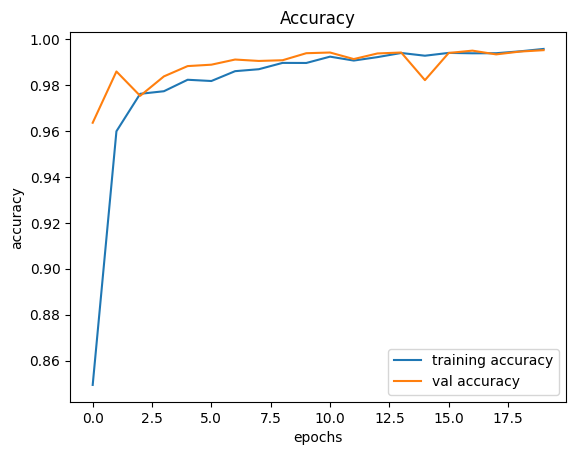

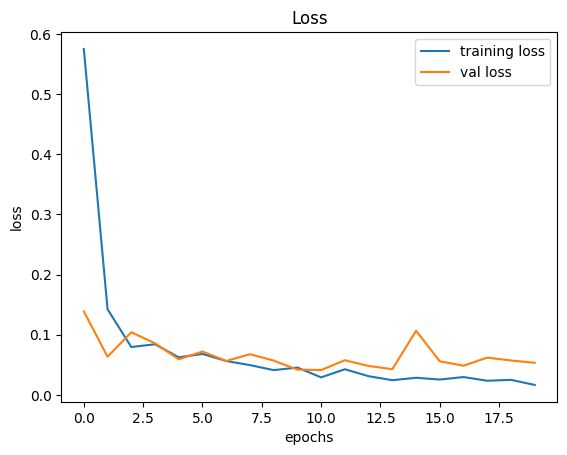

In [19]:
#Accuracy and Loss

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**Testing And Accuracy**

In [20]:
# Importing the test dataset
y_test = pd.read_csv('/content/Dataset/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

# Retreiving the images
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('/content/Dataset/'+img)
        image = image.resize([50, 50])
        data.append(np.array(image))

X_test = np.array(data)

In [21]:
with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print('Accuracy: ' + str(accuracy_score(labels, pred)*100) + ' %')

395/395 [==============================] - 1s 3ms/step
Accuracy: 97.12589073634204 %


**Confusion Matrix**

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels, pred)
np.savetxt("confusion_matrix.csv", cm, delimiter=",")
cm = np.loadtxt("confusion_matrix.csv", delimiter=",")

      0      1      2      3      4      5      6      7      8      9   ...  \
0   60.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
1    0.0  709.0    0.0    0.0    2.0    0.0    0.0    0.0    0.0    0.0  ...   
2    0.0    1.0  743.0    3.0    0.0    2.0    0.0    0.0    0.0    1.0  ...   
3    0.0    0.0    0.0  440.0    0.0    7.0    0.0    0.0    0.0    1.0  ...   
4    1.0    0.0    2.0    0.0  650.0    1.0    2.0    1.0    0.0    0.0  ...   
5    0.0    4.0    1.0    4.0    0.0  616.0    0.0    2.0    1.0    2.0  ...   
6    0.0    0.0    0.0    1.0    0.0    2.0  132.0    0.0    0.0    0.0  ...   
7    0.0    0.0    0.0    0.0    0.0    4.0    0.0  445.0    1.0    0.0  ...   
8    1.0    0.0    1.0    0.0    2.0    6.0    0.0    0.0  428.0   10.0  ...   
9    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  480.0  ...   
10   0.0    1.0    0.0    0.0    0.0    1.0    0.0    0.0    1.0    0.0  ...   
11   0.0    0.0    0.0    0.0    0.0    

<Axes: >

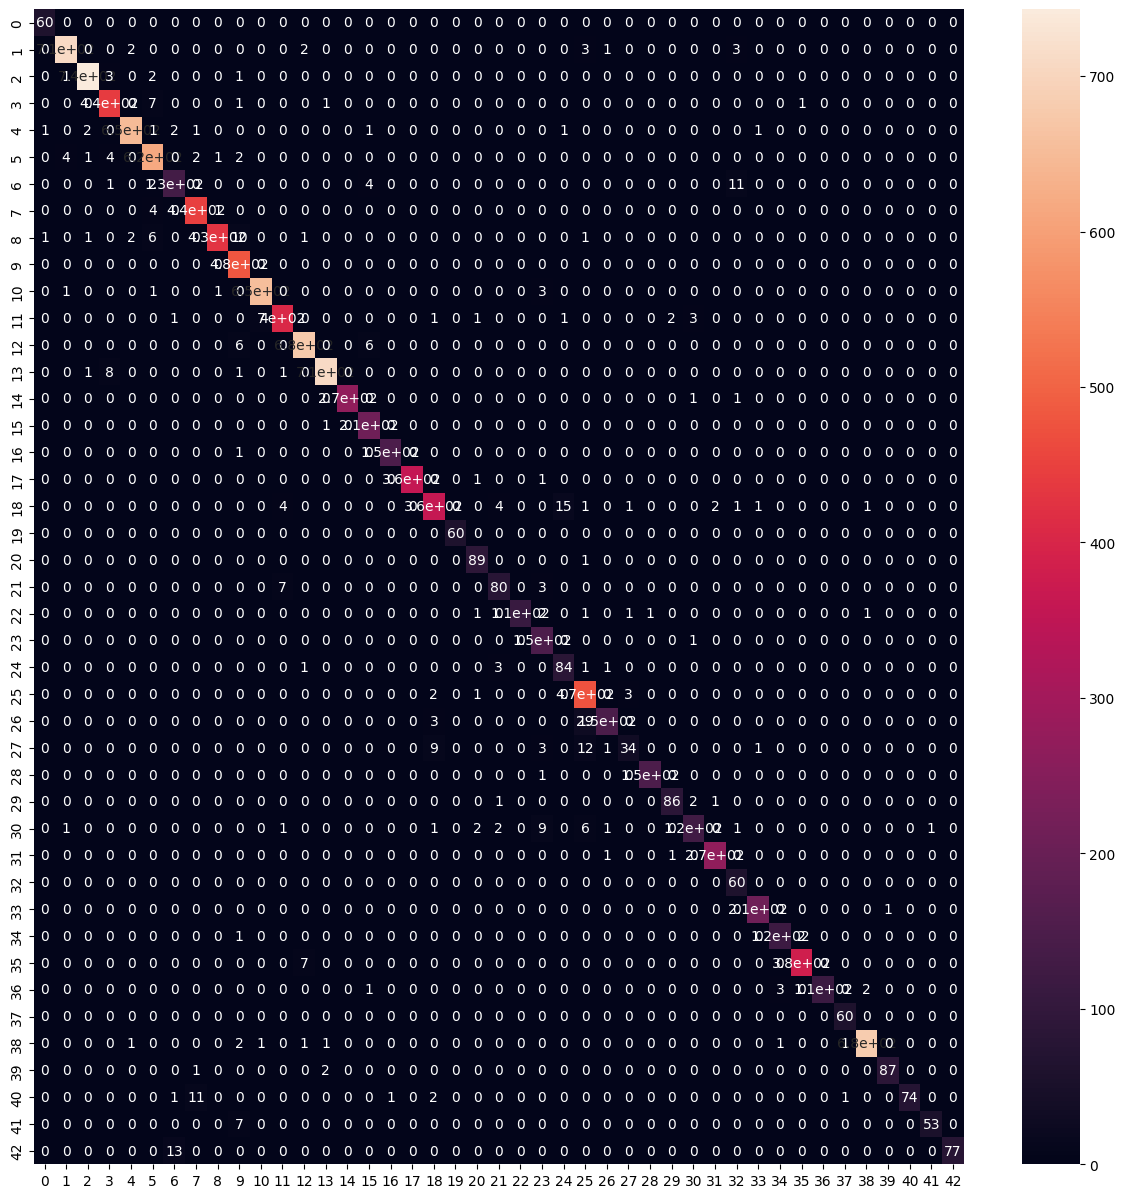

In [23]:
import seaborn as sns
df= pd.DataFrame(cm, index = classes,  columns = classes)
print(df)
plt.figure(figsize = (15,15))
sns.heatmap(df, annot=True)

In [24]:
model.save("./trained/Dlpproj.h5")

**Loading the model**

In [25]:
from keras.models import load_model
model = load_model('./trained/Dlpproj.h5')

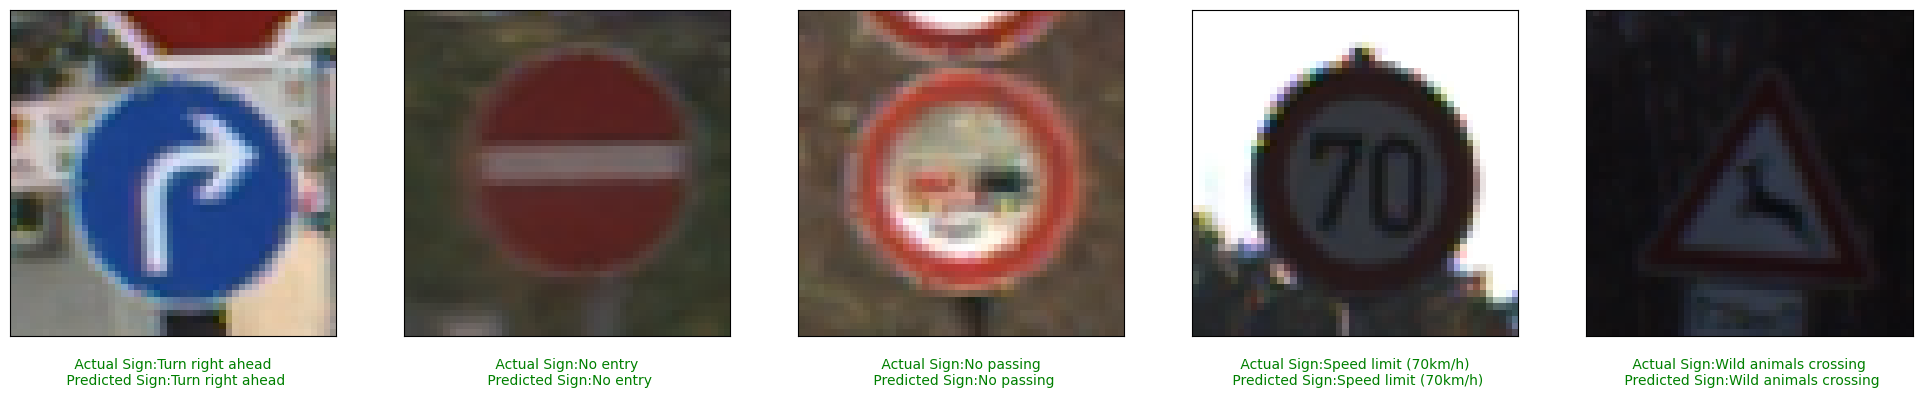

In [26]:
import random
plt.figure(figsize = (50, 50))

start_index = random.randint(0, 12360)
for i in range(5):
    start_index = random.randint(0, 12360)

    plt.subplot(10,10, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('\n Actual Sign:{} \n Predicted Sign:{}'.format(classes[actual],classes[prediction]), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

#INPUT IMAGE TO CLASSIFY


Saving Screenshot 2023-05-14 132806.png to Screenshot 2023-05-14 132806.png
1/1 [==============================] - 0s 201ms/step


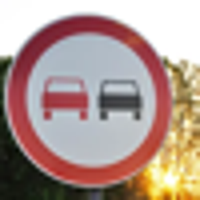

[9]
Sign=No passing


In [27]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def test_on_img():
    uploaded = files.upload()
    data = []
    for filename in uploaded.keys():
        image = Image.open(filename)
        
        image=rgb_image = image.convert("RGB")
        image = image.resize((50,50))
        
        data.append(np.array(image))
    
    x_test = np.array(data)
    y_pred = np.argmax(model.predict(x_test), axis=-1)

    return image, y_pred

pic, res = test_on_img()
pic = ImageOps.scale(pic, 4)  # Scale up the image by a factor of 2
pic.show()
print(res)
print("Sign={}".format(classes[res.item()]))



In [47]:
from pyngrok import ngrok
ngrok.set_auth_token('2PmWQPHwg91t57bjOvrobJxRRT3_4PDUhniWt3ekdcN6g3iop')

In [73]:
import gradio as gr
from PIL import Image, ImageOps
import numpy as np

# Define the image classes
classes = {0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing',
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons'}

model = load_model('/content/trained/Dlpproj.h5')

def classify_image(image):
    image = Image.fromarray(image.astype('uint8'), 'RGB')
    
    image = ImageOps.scale(image, 4)  # Scale up the image by a factor of 2
    image = image.convert("RGB")
    image = image.resize((50,50))
    image_array = np.array(image)
    image_array = np.expand_dims(image_array, axis=0)

    y_pred = model.predict(image_array)
    y_pred = np.argmax(y_pred, axis=-1)
    
    return classes[y_pred.item()]

inputs = gr.inputs.Image(label="Input Image")
outputs = gr.outputs.Label(label="Predicted Sign")
title = "Traffic Sign Classifier"

description = "Upload an image of a traffic sign "
theme = "default"
iface = gr.Interface(fn=classify_image, inputs=inputs, outputs=outputs, title=title, description=description, theme=theme)
iface.launch(share=True)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:663: UserWarning: Cannot load black. Caught Exception: The space black does not exist
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d4e81ac5b6d1516faa.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
